### Low Pass filter

A low-pass filter can be applied only on the Fourier Transform of an image (frequency-domain image), rather than the original image (spacial-domain image). After applying low-pass filter on it, then the filtered frequency-domain image is restored into pixel image, which is a blurred version of the original image.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*gxUNf1jfdcvrNmNpHp-hRg.png" width="600" height="400">

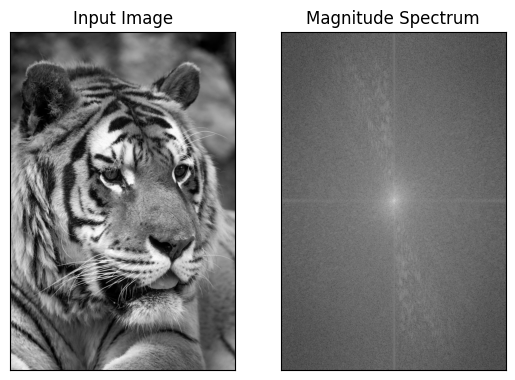

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('tiger.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

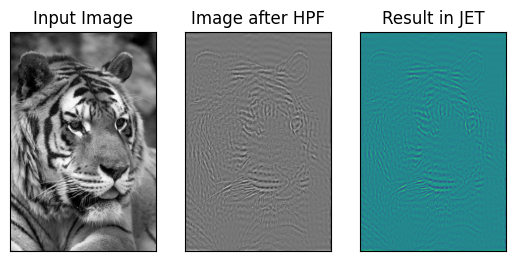

In [11]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
 
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
 
plt.show()